In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = diabetes_data.data  # Features
y = diabetes_data.target  # Target variable (diabetes progression)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Model Evaluation: Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2821.750981001311
R-squared (R²): 0.4772897164322617


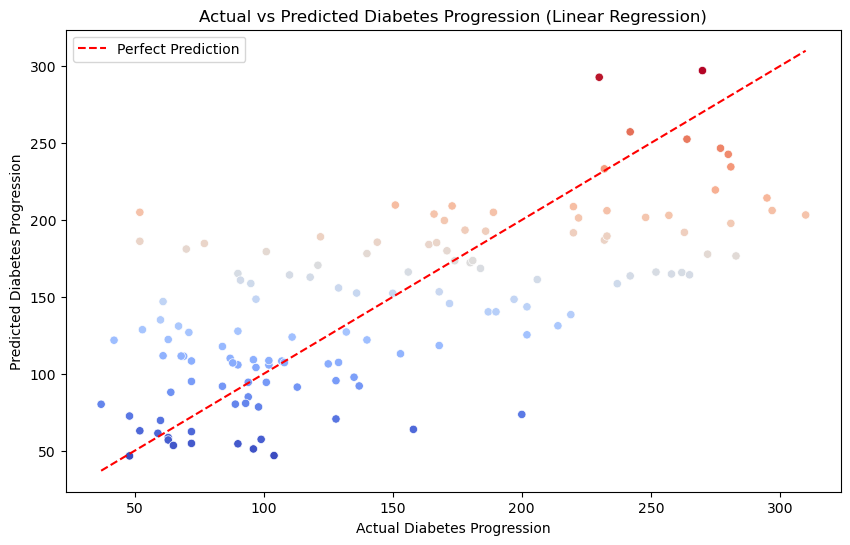

In [30]:
# Visualizing the actual vs predicted diabetes progression with different colors
plt.figure(figsize=(10, 6))

# Define the color palette based on predicted values
sns.scatterplot(x=y_test, y=y_pred, hue=y_pred, palette="coolwarm", legend=False)

# Plot the line of perfect prediction (ideal scenario where y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs Predicted Diabetes Progression (Linear Regression)")

# Add legend
plt.legend()

# Save the plot as a PNG image with high resolution
plt.savefig("actual_vs_predicted_diabetes_lr.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

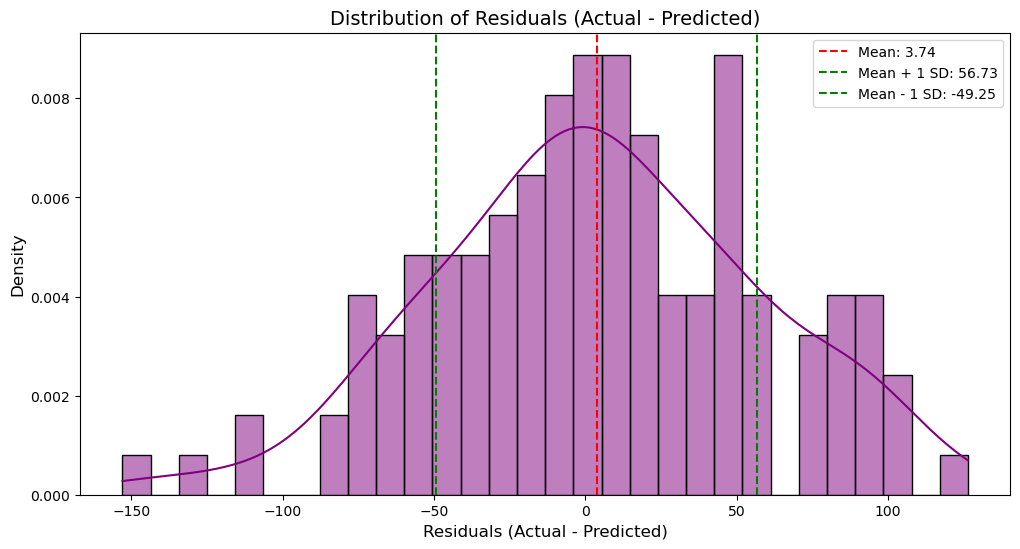

In [31]:
# Plot residuals
plt.figure(figsize=(12, 6))

# Plot the distribution of residuals with KDE
sns.histplot(residuals, kde=True, color='purple', bins=30, stat="density")

# Calculate statistics for labels
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Add labels and title for residuals plot
plt.title("Distribution of Residuals (Actual - Predicted)", fontsize=14)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add vertical lines for the mean and standard deviation
plt.axvline(mean_residual, color='red', linestyle='--', label=f'Mean: {mean_residual:.2f}')
plt.axvline(mean_residual + std_residual, color='green', linestyle='--', label=f'Mean + 1 SD: {mean_residual + std_residual:.2f}')
plt.axvline(mean_residual - std_residual, color='green', linestyle='--', label=f'Mean - 1 SD: {mean_residual - std_residual:.2f}')

# Add a legend to the plot
plt.legend()
plt.savefig("residuals_distribution_diabetes.png", dpi=300, bbox_inches="tight")
plt.show()